## Pseudotime Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.pyplot import rc_context
import scanpy as sc
import scipy.io
import os
import math
from pylab import *
from matplotlib.colors import ListedColormap,LinearSegmentedColormap 
import seaborn as sns
from pathlib import Path
%matplotlib inline

In [2]:
sc.settings.set_figure_params(dpi=100, dpi_save=300, figsize=(5, 5))
plt.set_cmap('viridis')
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

<Figure size 500x500 with 0 Axes>

In [20]:
adata=sc.read_h5ad('PlasmaType.h5ad')

In [21]:
sc.tl.diffmap(adata)

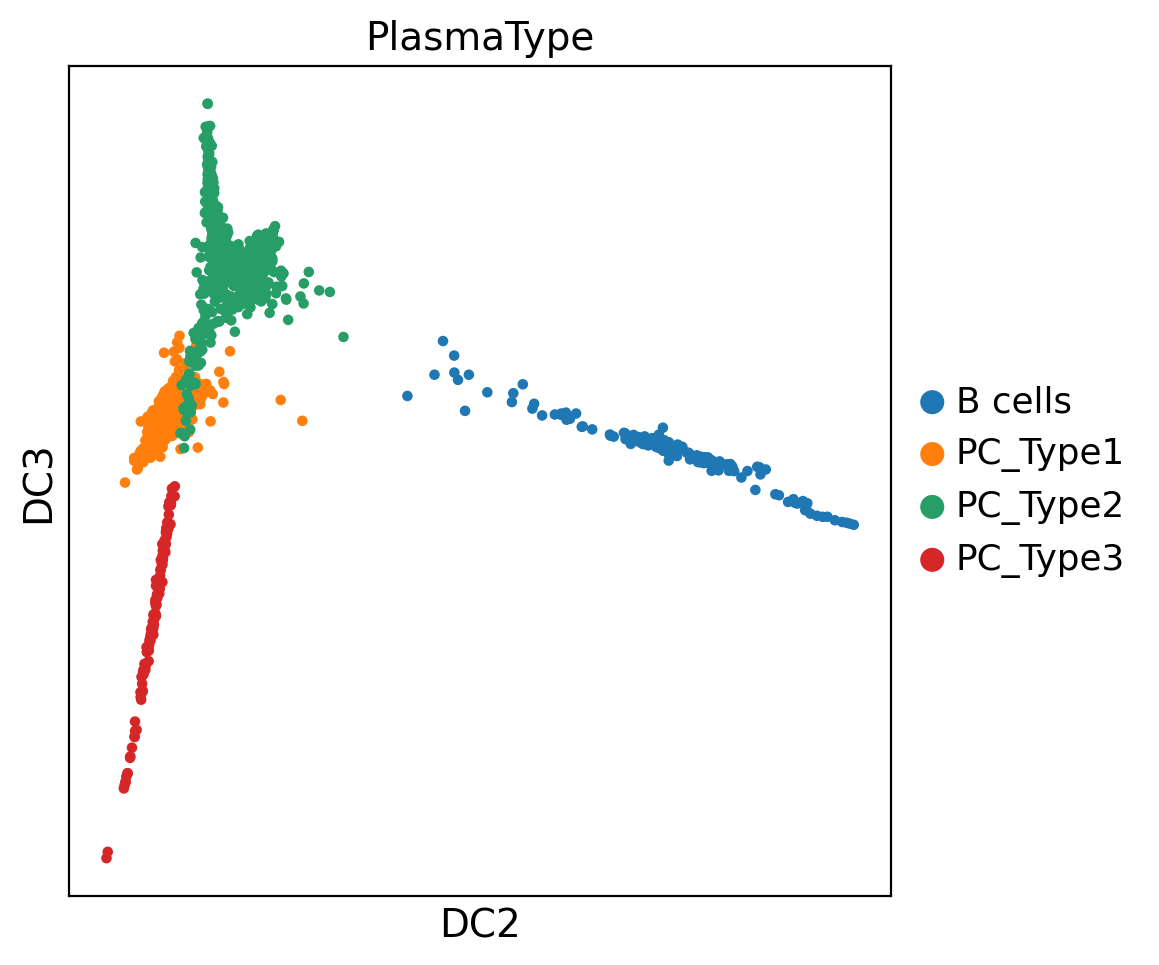

In [22]:
root_ixs = adata.obsm["X_diffmap"][:, 3].argmin()
sc.pl.scatter(
    adata,
    basis="diffmap",
    color=["PlasmaType"],
    components=[2, 3],
)

adata.uns["iroot"] = root_ixs

In [23]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['PlasmaType']  == 'B cells')[0]
sc.tl.dpt(adata)

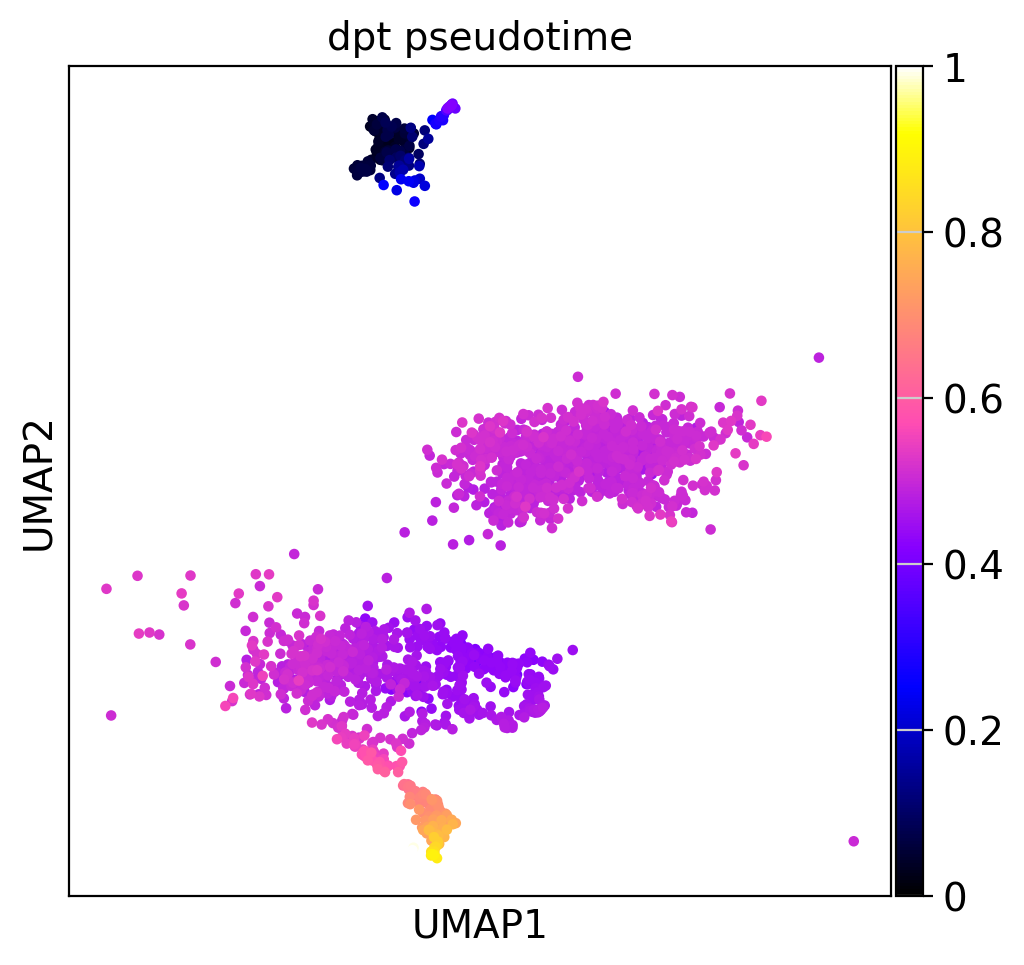

In [24]:
sc.pl.scatter(
    adata,
    basis="umap",
    color=["dpt_pseudotime"],
    color_map="gnuplot2",
    save='_plasma_pseudotime.pdf'
)